In [1]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from scipy.io import wavfile as wav
from keras.models import load_model
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
audio1= "D:/Joy/Research_Joy/Music_Research/all_dataset/10s_clips/Karaharapriya_1.wav"

In [3]:
data,sr1=librosa.load(audio1)
ipd.Audio(audio1)

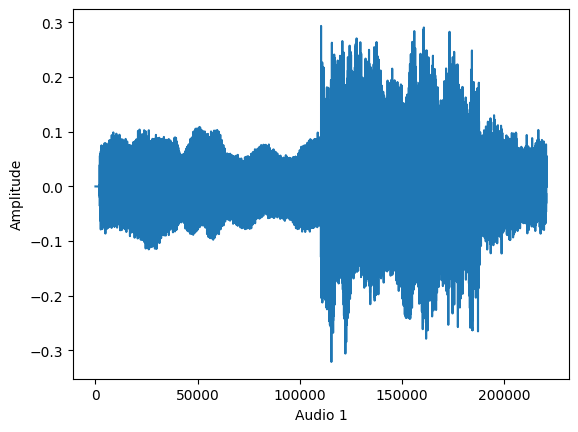

In [4]:
plt.plot(data)
plt.xlabel('Audio 1')
plt.ylabel('Amplitude')
plt.show()

In [5]:
wavesr2, wave_audio=wav.read(audio1)

In [6]:
wavesr2

44100

In [7]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [1607, 1701],
       [1630, 1777],
       [1677, 1861]], dtype=int16)

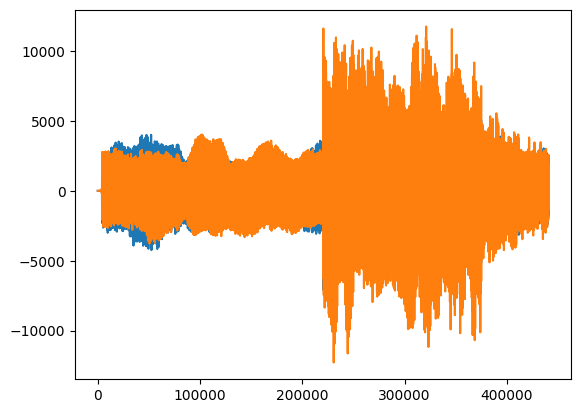

In [8]:
plt.plot(wave_audio)
plt.show()

In [9]:

folder_path = 'D:/Joy/Research_Joy/Music_Research/all_dataset/10s_clips'
file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

# Extract the text before '_' for each file name
raga_name = [name.split('_')[0] for name in file_names]

print(raga_name)

['Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriy

In [10]:
print(file_names[:5])
print(raga_name[:5])

['Karaharapriya_1.wav', 'Karaharapriya_10.wav', 'Karaharapriya_100.wav', 'Karaharapriya_1000.wav', 'Karaharapriya_1001.wav']
['Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya', 'Karaharapriya']


In [11]:
def features_extractor(file_or_audio, sample_rate=None):
    if isinstance(file_or_audio, str):
        audio, sample_rate = librosa.load(file_or_audio)
    else:
        audio = file_or_audio

    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    return mfccs_scaled_features

In [12]:
extracted_features = []
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    features = features_extractor(file_path)
    file_name = file_name.title()
    extracted_features.append([features, file_name.split('_')[0]])
print(extracted_features)

In [13]:
features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
features_df.head()

,feature,class
0,"[-279.11896, 151.75774, 1.8943567, 35.67748, -...",Karaharapriya
1,"[-154.72041, 127.4437, -29.283989, 65.31236, -...",Karaharapriya
2,"[-158.13225, 113.79881, -0.76598215, 57.34267,...",Karaharapriya
3,"[-187.13591, 114.56636, -18.162085, 34.96113, ...",Karaharapriya
4,"[-213.62576, 107.125595, -30.012241, 28.065916...",Karaharapriya


In [14]:
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [15]:
y.shape

(7395, 5)

In [16]:
originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Karaharapriya' 'Keeravani' 'Sarasangi' 'Shanmugapriya' 'Thodi']
Encoded labels:  [0 1 2 3 4]


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [18]:
X_train.shape

(5916, 40)

In [19]:
y_train.shape

(5916, 5)

In [20]:
X_train.shape

(5916, 40)

In [21]:
y_test.shape

(1479, 5)

In [22]:
num_labels = y.shape[1]
print(num_labels)

5


In [23]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_train])


In [24]:
num_classes = 5
model = Sequential()
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

D:\Joy\Research_Joy\Music_Research\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 36, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 18, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 14, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,157 (942.02 KB)

 Trainable params: 240,773 (940.52 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [27]:
num_classes = 5
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 30
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_model_10s.keras', verbose=1, save_best_only=True)

start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), verbose=1, callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/30
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5513 - loss: 1.1476
Epoch 1: val_loss improved from inf to 0.37236, saving model to saved_model_10s.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.5540 - loss: 1.1416 - val_accuracy: 0.8810 - val_loss: 0.3724
Epoch 2/30
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9084 - loss: 0.2716
Epoch 2: val_loss improved from 0.37236 to 0.33635, saving model to saved_model_10s.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9085 - loss: 0.2713 - val_accuracy: 0.8891 - val_loss: 0.3363
Epoch 3/30
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9351 - loss: 0.1844
Epoch 3: val_loss improved from 0.33635 to 0.17193, saving model to saved_model_10s.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9353 - loss: 0.1841 - val_accuracy: 0.9412 - val_loss: 0.1719
Epoch 4/30
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9681 - loss: 0.1015
Epoch 4: val_loss did not impro

In [28]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 98.03921580314636%
train set accuracy: 99.74644780158997%


In [29]:
saved_model = load_model('saved_model_10s.keras')
np.save('label_encoder_classes_ragas_10s.npy', le.classes_)

In [30]:
y_pred = saved_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("Confusion Matrix:")
print(conf_matrix)

print("\nF1 Score:")
print(f1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=originallabels))

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Confusion Matrix:
[[299   0   2   0   1]
 [  4 286   2   0   2]
 [  2   1 293   0   1]
 [  1   0   1 293   3]
 [  4   0   3   2 279]]

F1 Score:
0.9804136842721972

Classification Report:
               precision    recall  f1-score   support

Karaharapriya       0.96      0.99      0.98       302
    Keeravani       1.00      0.97      0.98       294
    Sarasangi       0.97      0.99      0.98       297
Shanmugapriya       0.99      0.98      0.99       298
        Thodi       0.98      0.97      0.97       288

     accuracy                           0.98      1479
    macro avg       0.98      0.98      0.98      1479
 weighted avg       0.98      0.98      0.98      1479



In [31]:
file ="D:/Joy/Research_Joy/Music_Research/all_dataset/10s_clips/Karaharapriya_1.wav"
x,sr1 = librosa.load(file)
ipd.Audio(x,rate=sr1)

In [32]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class_label = np.argmax(predicted_probabilities)
predicted_class_label = np.array([predicted_class_label])

prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Predicted class: Karaharapriya
